In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True)

In [4]:
df

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [5]:
X = df[[col for col in df.columns if col != '1']]
y = None

In [6]:
X

,15.26,14.84,0.871,5.763,3.312,2.221,5.22
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def draw_clusters(X, y=None, centers=None, cluster_size=10000):
    _, ax = plt.subplots(figsize=(10, 10))
    
    if y is not None:
        cm = {c: f"C{c}" for c in np.unique(y)}
        colors = [cm[i] for i in y]
    else:
        cm = None
        colors = "b"
    
    ax.scatter(X.iloc[:,0], X.iloc[:,1], color=colors)
    if centers is not None:
        colors = [cm[i] for i in range(len(centers))] if cm else "b"
        ax.scatter(
            centers[:,0], centers[:,1], marker="o", 
            c=colors, alpha=0.25, s=cluster_size
        )
    
    ax.set_xlabel("$X_0$")
    ax.set_xticks([])
    ax.set_ylabel("$X_1$")
    ax.set_yticks([])
    
    return ax

<AxesSubplot:xlabel='$X_0$', ylabel='$X_1$'>

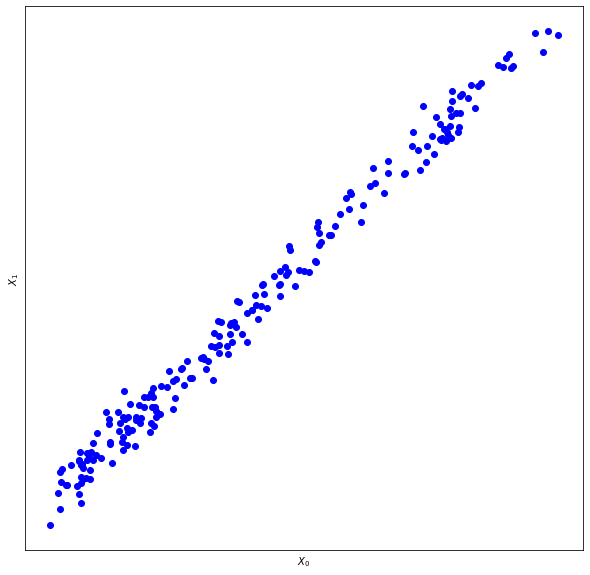

In [8]:
draw_clusters(X,y)

In [9]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3).fit(X)
y = model.fit_predict(X)

In [10]:
model.cluster_centers_

array([[14.63985915, 14.45507042,  0.87928169,  5.56097183,  3.27742254,
         2.65496056,  5.19192958],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

<AxesSubplot:xlabel='$X_0$', ylabel='$X_1$'>

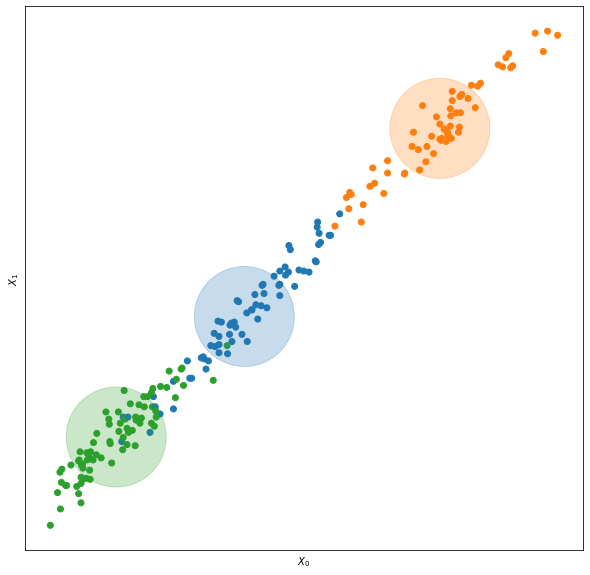

In [11]:
draw_clusters(X, y, model.cluster_centers_)

<AxesSubplot:xlabel='$X_0$', ylabel='$X_1$'>

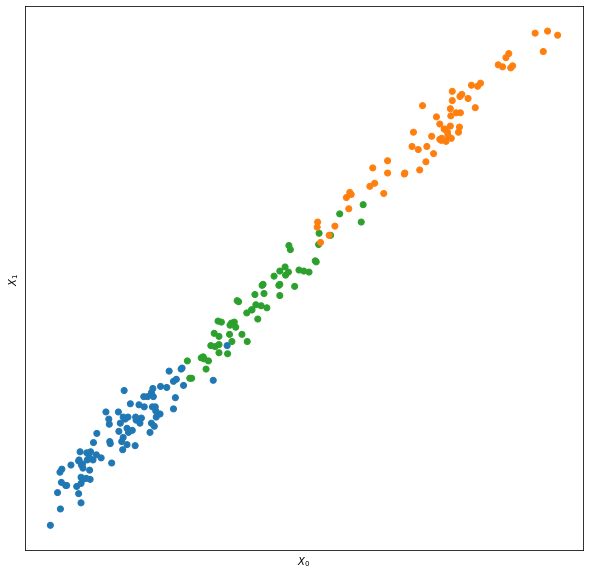

In [12]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
y = model.fit_predict(X)
draw_clusters(X, y)